In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
2D_orbit_modeling_K.pdf
2D_orbit_modeling_K1.ipynb
2D_orbit_modeling_K1.pdf
2D_orbit_modeling_K2.ipynb
2D_orbit_modeling_K2.pdf
2D_orbit_modeling_P.ipynb
2D_orbit_modeling_P.pdf
2D_orbit_modeling_e.ipynb
2D_orbit_modeling_e.pdf
2D_orbit_modeling_tau.ipynb
2D_orbit_modeling_tau.pdf
2D_orbit_modeling_w.ipynb
2D_orbit_modeling_w.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev1.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev2

In [3]:
#Read data ---#1
Input = "Linear_fit_Beuermann_2011_Table1_rev.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2400000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

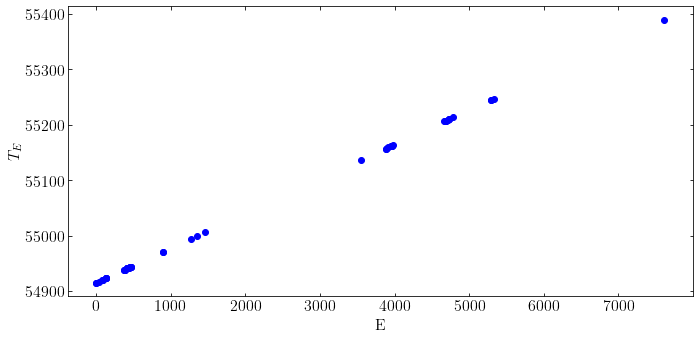

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

54


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

#params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)
params, params_covariance = optimization.curve_fit(linear_fit, x, y,sigma=dy, absolute_sigma=True)

Period = params[0]
T0 = params[1]

dPeriod = params_covariance[0,0]
dT0 = params_covariance[1,1]


print('Slope (m) is ', Period)
print('The error of the slope (dm) is ', dPeriod)
print('Intercept (c) is ', T0)
print('The error of the intercept (dc) is ', dT0)
#print(covariance)

Slope (m) is  0.06236285649304073
The error of the slope (dm) is  8.980005261065642e-19
Intercept (c) is  54914.832292031744
The error of the intercept (dc) is  7.591088868471324e-12


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, *params)

ys = Period*x + T0 #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

print(x_line)
print(y_line)
print(len(x_line))

#np.savetxt("Linear_fit_period_year_2020g.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
n = 2
dof = len_x - n
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[54914.83228  54914.894663 54916.827926 54919.696603 54920.756784
 54922.627668 54922.690017 54922.752365 54922.814727 54937.781831
 54937.844195 54938.717285 54938.779611 54940.650507 54940.712869
 54940.775243 54940.837637 54941.773045 54941.835408 54942.646122
 54942.770852 54942.833221 54942.895591 54943.706304 54943.768653
 54943.831008 54970.647033 54970.709414 54993.658926 54998.647982
 55005.632601 55135.970976 55156.9249   55156.987244 55157.922708
 55158.982865 55160.916107 55160.978466 55161.913906 55161.976285
 55162.911738 55205.942102 55206.004463 55206.93992  55207.002308
 55208.873171 55209.870977 55209.933305 55209.995687 55212.989111
 55244.918892 55244.981257 55246.976864 55389.66308 ]
[54914.83229203 54914.89465489 54916.82790344 54919.69659484
 54920.7567634  54922.62764909 54922.69001195 54922.75237481
 54922.81473766 54937.78182322 54937.84418608 54938.71726607
 54938.77962893 54940.65051462 54940.71287748 54940.77524033
 54940.83760319 54941.77304604 54941.83540

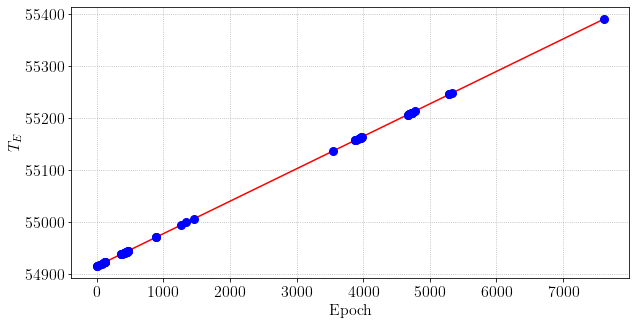

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

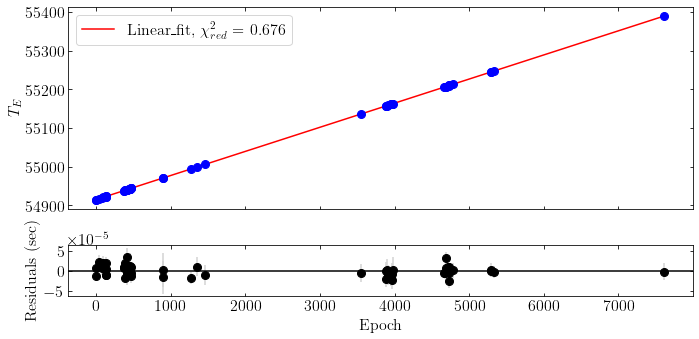

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("Linear_fit_period_year_2020g_Res.jpg", dpi=1000)

plt.show()

In [10]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [11]:
t = np.linspace(40000, 60000, num=100)

x_data = []
for i in range(len(t)):
    print('%0.0f %0.5f' %(i, t[i]))
    x_data.append('%0.0f %0.5f' %(i, t[i]))
    
data_out = x_data
f = open("x_data.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

0 40000.00000
1 40202.02020
2 40404.04040
3 40606.06061
4 40808.08081
5 41010.10101
6 41212.12121
7 41414.14141
8 41616.16162
9 41818.18182
10 42020.20202
11 42222.22222
12 42424.24242
13 42626.26263
14 42828.28283
15 43030.30303
16 43232.32323
17 43434.34343
18 43636.36364
19 43838.38384
20 44040.40404
21 44242.42424
22 44444.44444
23 44646.46465
24 44848.48485
25 45050.50505
26 45252.52525
27 45454.54545
28 45656.56566
29 45858.58586
30 46060.60606
31 46262.62626
32 46464.64646
33 46666.66667
34 46868.68687
35 47070.70707
36 47272.72727
37 47474.74747
38 47676.76768
39 47878.78788
40 48080.80808
41 48282.82828
42 48484.84848
43 48686.86869
44 48888.88889
45 49090.90909
46 49292.92929
47 49494.94949
48 49696.96970
49 49898.98990
50 50101.01010
51 50303.03030
52 50505.05051
53 50707.07071
54 50909.09091
55 51111.11111
56 51313.13131
57 51515.15152
58 51717.17172
59 51919.19192
60 52121.21212
61 52323.23232
62 52525.25253
63 52727.27273
64 52929.29293
65 53131.31313
66 53333.33333
67 53

In [12]:
#Input data
Input = "x_data.out"
Data   = np.genfromtxt(Input)

x = Data[:,1]
#print(t)

t = x
len_x = len(t)

Epoch = (t-BJD0)/P0

In [13]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [14]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [15]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39   
#e = 0
w = -2           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("w_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 46179.51862 46141.61722 37.90140
40202.02020 4.68289 4.32220 46379.18414 46343.63742 35.54672
40404.04040 4.80709 4.43229 46578.48761 46545.65762 32.82999
40606.06061 4.93129 4.54664 46777.41877 46747.67783 29.74094
40808.08081 5.05549 4.66591 46975.96975 46949.69803 26.27172
41010.10101 5.17969 4.79090 47174.13734 47151.71823 22.41911
41212.12121 5.30389 4.92247 47371.92638 47353.73843 18.18795
41414.14141 5.42810 5.06164 47569.35530 47555.75863 13.59667
41616.16162 5.55230 5.20950 47766.46469 47757.77884 8.68585
41818.18182 5.67650 5.36715 47963.32988 47959.79904 3.53084
42020.20202 5.80070 5.53553 48160.07809 48161.81924 -1.74115
42222.22222 5.92490 5.71506 48356.90703 48363.83944 -6.93241
42424.24242 6.04910 5.90515 48554.09522 48565.85964 -11.76442
42626.26263 6.17330 6.10366 48751.98389 48767.87985 -15.89597
42828.28283 0.01431 0.02346 48950.91121 48969.90005 -18.98884
43030.30303 0.13851 0.2258

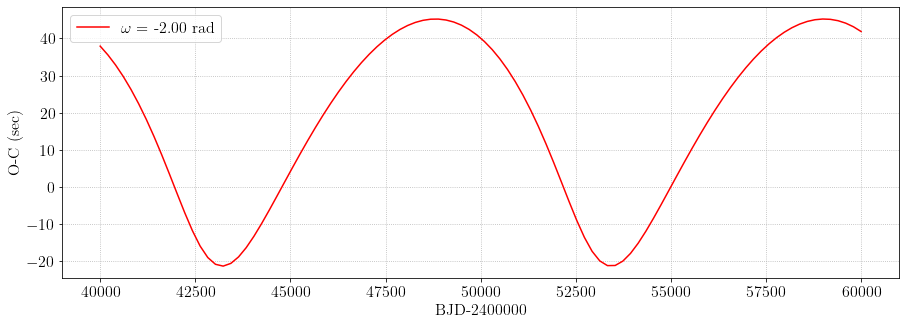

In [16]:
InputFile_out = "w_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\omega$ = -2.00 rad')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [17]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39 
#e = 0
w = -1           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("w_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 46151.44315 46141.61722 9.82593
40202.02020 4.68289 4.32220 46349.97406 46343.63742 6.33664
40404.04040 4.80709 4.43229 46548.44094 46545.65762 2.78332
40606.06061 4.93129 4.54664 46746.87695 46747.67783 -0.80088
40808.08081 5.05549 4.66591 46945.32415 46949.69803 -4.37388
41010.10101 5.17969 4.79090 47143.83656 47151.71823 -7.88167
41212.12121 5.30389 4.92247 47342.48413 47353.73843 -11.25430
41414.14141 5.42810 5.06164 47541.35781 47555.75863 -14.40082
41616.16162 5.55230 5.20950 47740.57563 47757.77884 -17.20322
41818.18182 5.67650 5.36715 47940.28842 47959.79904 -19.51062
42020.20202 5.80070 5.53553 48140.68260 48161.81924 -21.13664
42222.22222 5.92490 5.71506 48341.97274 48363.83944 -21.86670
42424.24242 6.04910 5.90515 48544.37343 48565.85964 -21.48621
42626.26263 6.17330 6.10366 48748.04169 48767.87985 -19.83816
42828.28283 0.01431 0.02346 48953.00125 48969.90005 -16.89880
43030.30303 0.13851 0

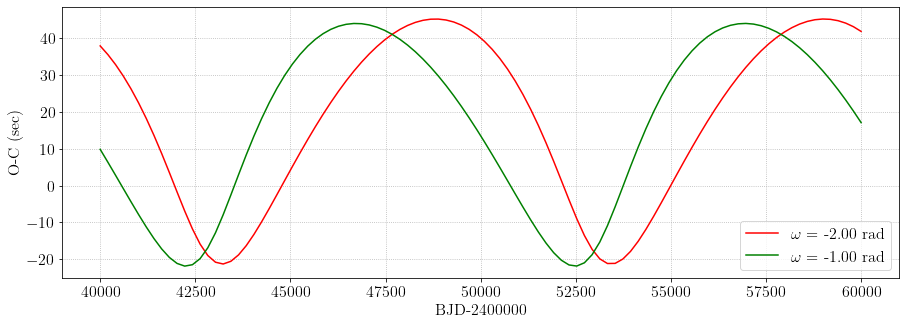

In [18]:
InputFile_out = "w_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\omega$ = -2.00 rad')
plt.plot(x_b, y_b, '-', color='green',label=r'$\omega$ = -1.00 rad')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [19]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39         
#e = 0
w = 0           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("w_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 46114.33124 46141.61722 -27.28598
40202.02020 4.68289 4.32220 46314.93563 46343.63742 -28.70179
40404.04040 4.80709 4.43229 46515.83288 46545.65762 -29.82474
40606.06061 4.93129 4.54664 46717.06910 46747.67783 -30.60873
40808.08081 5.05549 4.66591 46918.69758 46949.69803 -31.00046
41010.10101 5.17969 4.79090 47120.77991 47151.71823 -30.93832
41212.12121 5.30389 4.92247 47323.38685 47353.73843 -30.35159
41414.14141 5.42810 5.06164 47526.59825 47555.75863 -29.16038
41616.16162 5.55230 5.20950 47730.50105 47757.77884 -27.27779
41818.18182 5.67650 5.36715 47935.18293 47959.79904 -24.61612
42020.20202 5.80070 5.53553 48140.71809 48161.81924 -21.10115
42222.22222 5.92490 5.71506 48347.14070 48363.83944 -16.69874
42424.24242 6.04910 5.90515 48554.40413 48565.85964 -11.45551
42626.26263 6.17330 6.10366 48762.33684 48767.87985 -5.54302
42828.28283 0.01431 0.02346 48970.62625 48969.90005 0.72620
43030.30303 0.1

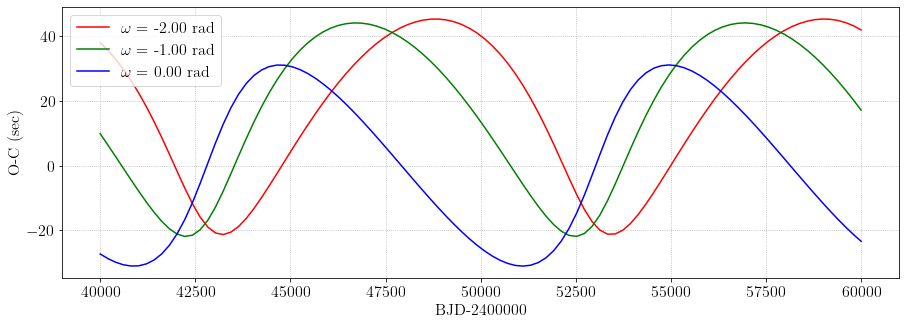

In [20]:
InputFile_out = "w_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\omega$ = -2.00 rad')
plt.plot(x_b, y_b, '-', color='green',label=r'$\omega$ = -1.00 rad')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\omega$ = 0.00 rad')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [21]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39        
#e = 0
w = 1           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("w_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 46102.30340 46141.61722 -39.31383
40202.02020 4.68289 4.32220 46306.28302 46343.63742 -37.35440
40404.04040 4.80709 4.43229 46510.64314 46545.65762 -35.01449
40606.06061 4.93129 4.54664 46715.40042 46747.67783 -32.27741
40808.08081 5.05549 4.66591 46920.57038 46949.69803 -29.12766
41010.10101 5.17969 4.79090 47126.16557 47151.71823 -25.55267
41212.12121 5.30389 4.92247 47332.19249 47353.73843 -21.54594
41414.14141 5.42810 5.06164 47538.64648 47555.75863 -17.11215
41616.16162 5.55230 5.20950 47745.50349 47757.77884 -12.27535
41818.18182 5.67650 5.36715 47952.70737 47959.79904 -7.09167
42020.20202 5.80070 5.53553 48160.15194 48161.81924 -1.66731
42222.22222 5.92490 5.71506 48367.65952 48363.83944 3.82008
42424.24242 6.04910 5.90515 48574.96514 48565.85964 9.10550
42626.26263 6.17330 6.10366 48781.72643 48767.87985 13.84658
42828.28283 0.01431 0.02346 48987.58187 48969.90005 17.68182
43030.30303 0.13851 

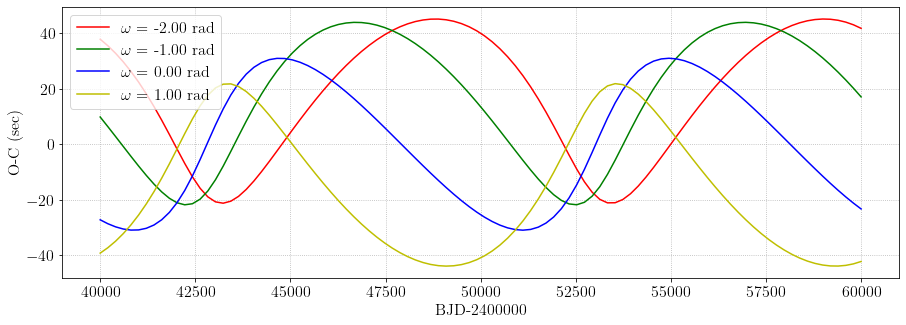

In [22]:
InputFile_out = "w_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\omega$ = -2.00 rad')
plt.plot(x_b, y_b, '-', color='green',label=r'$\omega$ = -1.00 rad')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\omega$ = 0.00 rad')
plt.plot(x_d, y_d, '-', color='y',label=r'$\omega$ = 1.00 rad')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [23]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39  
#e = 0
w = 2           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("w_output_e.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
40000.00000 4.55869 4.21580 46126.41797 46141.61722 -15.19925
40202.02020 4.68289 4.32220 46331.97140 46343.63742 -11.66602
40404.04040 4.80709 4.43229 46537.64313 46545.65762 -8.01449
40606.06061 4.93129 4.54664 46743.40508 46747.67783 -4.27275
40808.08081 5.05549 4.66591 46949.22071 46949.69803 -0.47732
41010.10101 5.17969 4.79090 47155.04198 47151.71823 3.32375
41212.12121 5.30389 4.92247 47360.80519 47353.73843 7.06676
41414.14141 5.42810 5.06164 47566.42542 47555.75863 10.66679
41616.16162 5.55230 5.20950 47771.78976 47757.77884 14.01092
41818.18182 5.67650 5.36715 47976.74985 47959.79904 16.95081
42020.20202 5.80070 5.53553 48181.11674 48161.81924 19.29750
42222.22222 5.92490 5.71506 48384.66428 48363.83944 20.82484
42424.24242 6.04910 5.90515 48587.15276 48565.85964 21.29312
42626.26263 6.17330 6.10366 48788.38377 48767.87985 20.50391
42828.28283 0.01431 0.02346 48988.27919 48969.90005 18.37914
43030.30303 0.13851 0.22585

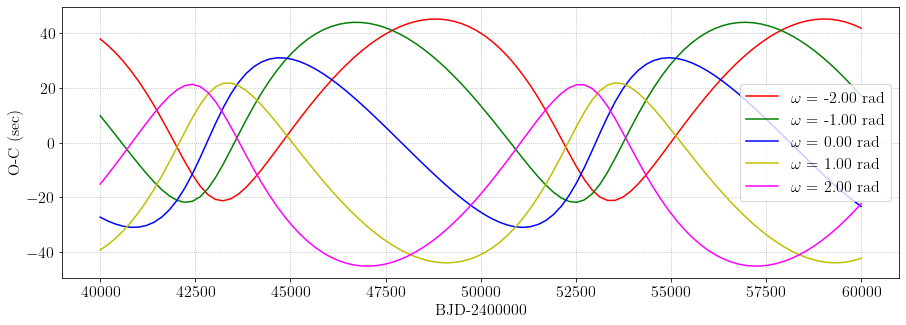

In [24]:
InputFile_out = "w_output_e.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_e = Data_out[:,0]
y_e = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\omega$ = -2.00 rad')
plt.plot(x_b, y_b, '-', color='green',label=r'$\omega$ = -1.00 rad')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\omega$ = 0.00 rad')
plt.plot(x_d, y_d, '-', color='y',label=r'$\omega$ = 1.00 rad')
plt.plot(x_e, y_e, '-', color='magenta',label=r'$\omega$ = 2.00 rad')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_w_rev2.pdf", format='pdf', dpi=1200)
plt.show()